Treinamento de modelos (e.g., Regressão Linear, Ridge, Lasso, Random Forest, XGBoost, SVM, etc.)
Ajuste de hiperparâmetros usando técnicas como Grid Search e Random Search
Comparação dos modelos com base em métricas de desempenho <br>


Para um dataset com um target quantitativo discreto (valores de 0 a 20) e que inclui features categóricas e numéricas, você pode usar diversos algoritmos de machine learning. A escolha do algoritmo pode depender do tamanho do dataset, da complexidade do problema e da necessidade de interpretação dos resultados. Aqui estão alguns algoritmos recomendados:

### 1. **Regressão Linear e Polinomial**

- **Regressão Linear**: Pode ser uma boa escolha para entender as relações lineares entre as features e o target. Pode ser estendida para **Regressão Polinomial** se houver relações não lineares.

### 2. **Árvores de Decisão e Ensemble Methods**

- **Árvores de Decisão**: Útil para modelar relações não lineares e interações entre features. Pode ser interpretável e fácil de visualizar.
- **Random Forest**: Um ensemble de árvores de decisão que melhora a precisão e reduz o risco de overfitting.
- **Gradient Boosting Machines (GBM)**: Métodos como **XGBoost**, **LightGBM**, e **CatBoost** são muito eficazes para problemas com dados mistos (numéricos e categóricos) e frequentemente proporcionam alta precisão.

### 3. **Algoritmos de Regressão Regularizados**

- **Regressão Ridge (L2 Regularization)** e **Regressão Lasso (L1 Regularization)**: Ajudam a prevenir overfitting ao regularizar o modelo. O Lasso também pode realizar seleção de features.

### 4. **Métodos Baseados em K-Vizinhos**

- **K-Nearest Neighbors (KNN)**: Simples e eficaz para dados com uma estrutura mais complexa, embora possa ser mais lento para grandes datasets.

### 5. **Modelos Baseados em Máquinas de Vetores de Suporte**

- **Support Vector Machines (SVM)**: Pode ser usado para regressão (SVR). Funciona bem com características não lineares quando se usa o kernel apropriado.

### 6. **Modelos de Redes Neurais**

- **Redes Neurais Artificiais (ANN)**: Podem capturar relações complexas entre features e target. Podem ser úteis se o dataset for grande e você precisar de modelos mais complexos.

### 7. **Modelos Estatísticos**

- **Modelos de Regressão Generalizada**: Se os dados tiverem uma distribuição específica (como Poisson ou Binomial), você pode considerar modelos de regressão generalizada adequados à distribuição do target.

### Processos de Preprocessamento

- **Codificação de Variáveis Categóricas**: Use técnicas como One-Hot Encoding ou Ordinal Encoding para converter variáveis categóricas em um formato utilizável pelos algoritmos.
- **Escalonamento**: Normalização ou padronização das features pode ser necessária para algoritmos sensíveis à escala, como KNN e SVM.
- **Tratamento de Valores Faltantes**: Imputação ou exclusão de dados faltantes para garantir a integridade do dataset.

### Avaliação do Modelo

- **Métricas de Avaliação**: Use métricas adequadas como **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)** ou **Root Mean Squared Error (RMSE)** para avaliar a performance dos modelos de regressão.

A escolha do algoritmo pode exigir experimentação e validação cruzada para encontrar o melhor modelo para o seu problema específico.                                                                                                                                                                                  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d1 = pd.read_csv("d1_trabalhado.csv", sep=",")

In [4]:
X = d1.drop(['G3'], axis=1)
y = d1['G3']

## 1. Regressão Linear e Polinomial

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = regressor.predict(X_test)

- Avaliando o modelo

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 5.689752292123776
R^2 Score: 0.7225194256935541


- Teste aplicando seleção de variáveis

In [24]:
selected_features = ['G2','famrel','studytime', 'health']

In [25]:
X = d1[selected_features]
y = d1['G3']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 4.105259972679124
R^2 Score: 0.7997927086433718


### Regressão Polinomial

In [57]:
selected_features = ['G2','famrel','studytime', 'health']

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = d1[selected_features]
y = d1['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

y_pred = model.predict(X_poly_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: %.2f" % mse)
print("R^2 Score: %.2f" % r2)

Mean Squared Error: 3.99
R^2 Score: 0.81


## 2. Lasso Regression

In [279]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: %.2f" % mse)
print("R^2 Score: %.2f" % r2)

print("Coeficientes:", lasso.coef_)

Mean Squared Error: 4.35
R^2 Score: 0.79
Coeficientes: [-0.         -0.14124463 -0.         -0.         -0.          0.
 -0.          0.         -0.         -0.18962112  0.          0.
  0.         -0.08459884 -0.          0.         -0.         -0.08710232
  0.23217423  0.          0.06202272 -0.          0.          0.01276021
  0.04257166  0.15479268  0.97796115  0.         -0.         -0.
  0.          0.         -0.          0.          0.         -0.07793555
 -0.          0.         -0.00158417  0.         -0.         -0.
  0.         -0.        ]


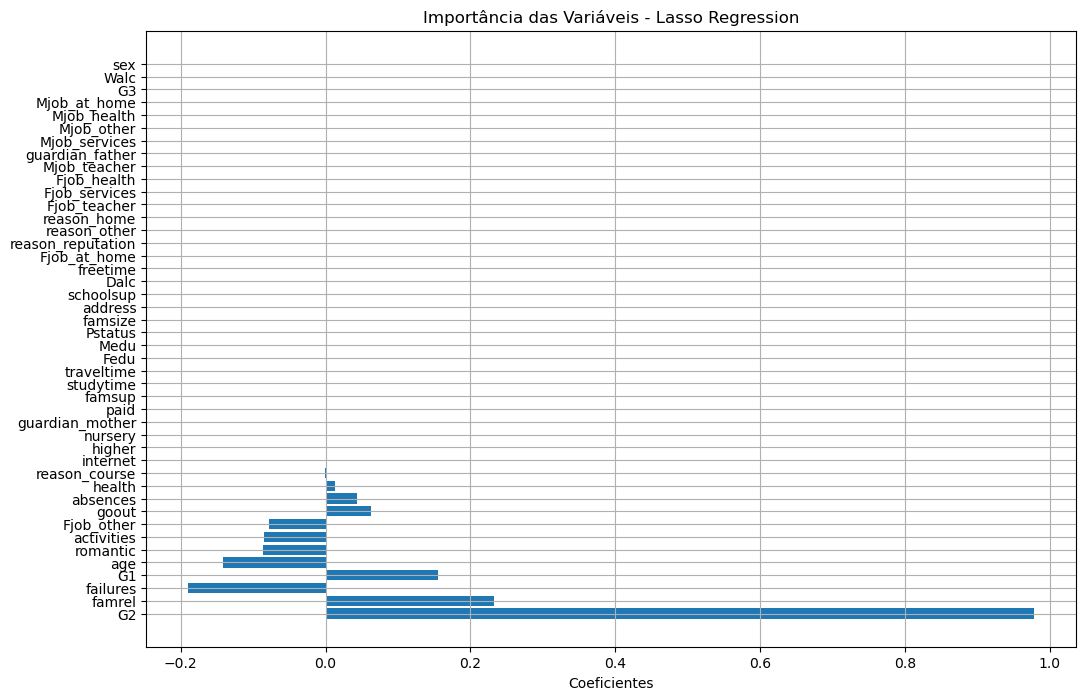

In [280]:
feature_names = d1.columns[:-1] 

sorted_indices = np.argsort(np.abs(lasso.coef_))[::-1]
sorted_coefs = lasso.coef_[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_coefs)), sorted_coefs, align='center')
plt.yticks(range(len(sorted_coefs)), sorted_feature_names)
plt.xlabel('Coeficientes')
plt.title('Importância das Variáveis - Lasso Regression')
plt.grid(True)
plt.show()

## 3. Árvores de Decisão

In [308]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

selected_features = ['absences', 'G2', 'studytime', 'failures']
X = d1[selected_features]
y = d1['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree = DecisionTreeRegressor(random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: %.2f" % mse)
print("R^2 Score: %.2f" % r2)

Mean Squared Error: 2.22
R^2 Score: 0.89
